In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [19]:
data = pd.read_csv("Churn Prdiction Data/churn.csv")
data.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [20]:
data.shape

(667, 20)

In [21]:
x = data.drop(["Churn","State","International plan","Voice mail plan"], axis = 1)
y = data["Churn"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [24]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

d:\data_set\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
lr.score(x_test, y_test)
y_pred = lr.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
ac = accuracy_score(y_test, y_pred)
ac

0.8876404494382022

In [30]:
lr.coef_

array([[ 2.84162850e-05, -1.22006032e-02, -3.19089176e-02,
         1.31749299e-02, -6.99676779e-03,  2.11645874e-03,
         7.65508736e-03,  5.10254994e-03,  9.51606701e-04,
         4.26785731e-04, -7.83327322e-03,  8.86797993e-05,
        -5.96745199e-03,  1.91149804e-02, -1.23845741e-03,
         2.76128368e-01]])

In [31]:
lr.intercept_

array([-0.02258152])

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score


In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

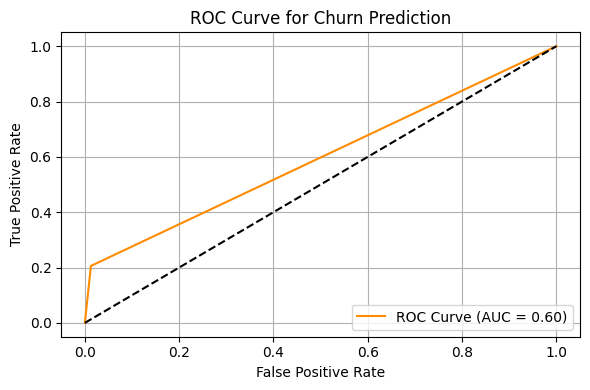

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Churn Prediction")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()